## MODEL TRAINING

### 1. Import Data and Required Packages

Import Pandas, Numpy, Matplotlib, Seaborn, and Warnings library.

In [1]:
# Basic Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Import the CSV Data as pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

Show Sample Data

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 2. Preparing Dataset

Preparing X and y variables

In [4]:
# make X variable from dataset
X = df.drop(columns=['math_score'], axis=1)

# make y variables from dataset
y = df['math_score']

In [5]:
# show sample data of X
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
# show sample data of y
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

### 3. Feature Transforming

Show unique value of dataset

In [7]:
# number of unique value of each categorical column
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [8]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features),
    ]
)

In [9]:
# conduct transformation
X = preprocessor.fit_transform(X)

In [10]:
# checking X shape
X.shape

(1000, 19)

### 4. Model Training

Preparing dataset into train, validation and test set. Proportion of dataset is :

* 60% for train set
* 20% for validation set
* 20% for test set

In [11]:
# separate dataset into temp and validation set
from sklearn.model_selection import train_test_split
X_temp, X_val, y_temp, y_val = train_test_split(X,y,test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [12]:
# show shape of splitting dataset
X_train.shape, X_test.shape, X_val.shape

((600, 19), (200, 19), (200, 19))

Create an Evaluation Function to give all metrics after model training

In [13]:
# create a function of model evaluation
def evaluate_model(true, predicted):
    '''
    true = factual value of target
    predicted = predicted value of target
    '''

    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [14]:
# model training and validation
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # model training

    # model predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # evaluate train and test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_val_mae , model_val_rmse, model_val_r2 = evaluate_model(y_val, y_val_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.2f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.2f}".format(model_train_mae))
    print("- R2 Score: {:.2f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Validation set')
    print("- Root Mean Squared Error: {:.2f}".format(model_val_rmse))
    print("- Mean Absolute Error: {:.2f}".format(model_val_mae))
    print("- R2 Score: {:.2f}".format(model_val_r2))
    r2_list.append(model_val_r2)
    
    print('='*30)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.33
- Mean Absolute Error: 4.24
- R2 Score: 0.88
----------------------------------
Model performance for Validation set
- Root Mean Squared Error: 5.41
- Mean Absolute Error: 4.23
- R2 Score: 0.88


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.61
- Mean Absolute Error: 5.21
- R2 Score: 0.81
----------------------------------
Model performance for Validation set
- Root Mean Squared Error: 6.44
- Mean Absolute Error: 5.10
- R2 Score: 0.83


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.33
- Mean Absolute Error: 4.24
- R2 Score: 0.88
----------------------------------
Model performance for Validation set
- Root Mean Squared Error: 5.41
- Mean Absolute Error: 4.23
- R2 Score: 0.88




K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.81
- Mean Absolute Error: 4.67
- R2 Score: 0.85
----------------------------------
Model performance for Validation set
- Root Mean Squared Error: 7.49
- Mean Absolute Error: 5.83
- R2 Score: 0.77


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.00
- Mean Absolute Error: 0.00
- R2 Score: 1.00
----------------------------------
Model performance for Validation set
- Root Mean Squared Error: 8.11
- Mean Absolute Error: 6.33
- R2 Score: 0.73


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.32
- Mean Absolute Error: 1.85
- R2 Score: 0.98
----------------------------------
Model performance for Validation set
- Root Mean Squared Error: 6.31
- Mean Absolute Error: 4.77
- R2 Score: 0.84


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.48
- Mean Absolute Error: 0.34
- R2 Score: 1.00
--------------------------

### RESULTS

In [15]:
# show R2_score for validation set
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.879857
0,Linear Regression,0.879831
7,CatBoosting Regressor,0.840929
8,AdaBoost Regressor,0.839783
5,Random Forest Regressor,0.836543
1,Lasso,0.829418
6,XGBRegressor,0.809250
3,K-Neighbors Regressor,0.769371
4,Decision Tree,0.729862


Based on the R2_score metric above, model Ridge and Linear Regression have the highest score on the validation set than other model. We will use Linear Regression model to predict test set.

### Linear Regression

In [19]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print('Accuracy of the model is %.2f' %score)


Accuracy of the model is 86.67


#### Plot y_pred and y_test

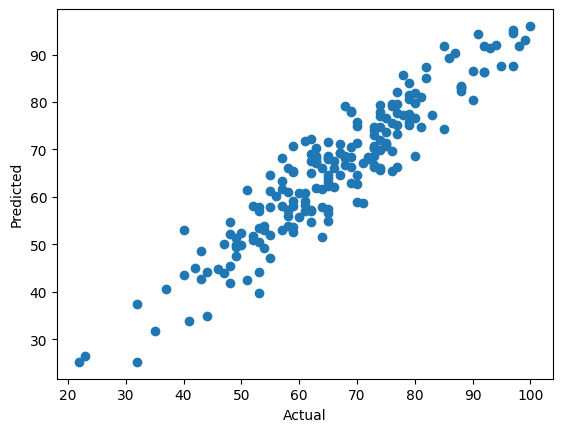

In [20]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

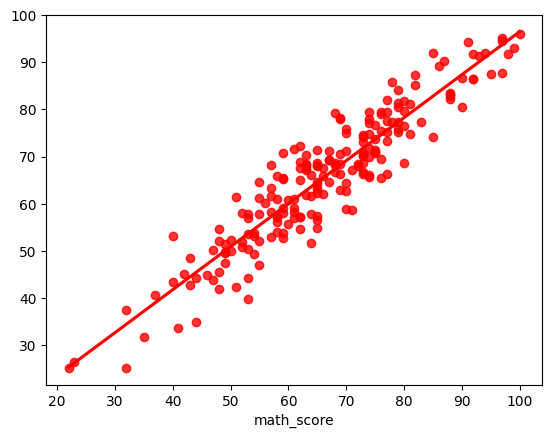

In [21]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [22]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
726,65,71.468750,-6.468750
138,59,59.062500,-0.062500
266,63,70.375000,-7.375000
765,74,65.765625,8.234375
798,69,68.375000,0.625000
...,...,...,...
946,82,87.281250,-5.281250
32,56,60.265625,-4.265625
145,22,25.234375,-3.234375
121,91,94.296875,-3.296875
